In [8]:
# Daten einlesen
wetterdaten <- readRDS("datasets/rds/wetterdaten.rds")

# Zeitindex als unabhängige Variable hinzufügen, weil Datum als unabhängige Variable nicht funktioniert, weil es nicht numerisch ist
wetterdaten[[1]]$Zeitindex <- as.numeric(wetterdaten[[1]]$MESS_DATUM - min(wetterdaten[[1]]$MESS_DATUM))

# Unnötige Spalten entfernen, damit cor() auf dataframe angewendet werden kann
wetterdaten[[1]]$MESS_DATUM <- NULL
wetterdaten[[1]]$STATIONS_ID <- NULL
head(wetterdaten[[1]])

,RSK,SDK,TMK,Zeitindex
,<dbl>,<dbl>,<dbl>,<dbl>
3985,0.1,0.0,4.2,0
3986,0.0,7.4,1.3,1
3987,0.0,7.2,-1.7,2
3988,0.0,2.8,-1.1,3
3989,0.0,0.0,2.0,4
3990,0.0,4.0,3.9,5


In [9]:
# Installieren und Laden benötigter Pakete
# install.packages("forecast", dependencies = TRUE)
library(forecast)

A Time Series:
[1]  4.2  1.3 -1.7 -1.1  2.0  3.9

A Time Series:
   [1]   4.2   1.3  -1.7  -1.1   2.0   3.9   4.4   3.8   3.3   6.8   6.9   7.3
  [13]   4.2   3.9   3.4   1.7   1.9   2.1   3.9   4.8  -0.3   2.9   1.1   2.2
  [25]   2.6   2.6   1.4   0.7   0.5   0.8  -0.9  -2.3  -3.9  -2.3   0.3   0.6
  [37]  -0.3   0.2   3.2   4.8   6.0   5.0   2.7   3.2   3.9   0.8   4.2   4.2
  [49]   9.1   4.0   3.0   3.4   3.9   4.3   3.9   2.4   3.1   3.5   4.8   4.5
  [61]   3.7   4.4   3.3   3.5   3.8   4.6   4.8   4.0   4.0   6.0   5.6   4.9
  [73]   4.8   6.5   6.6   8.8   7.7   8.0  10.7  11.0   9.4  10.9  12.7  10.5
  [85]   1.8   1.6   1.9   2.6   6.2   7.0   8.9  10.7  10.1  10.9  12.2  13.7
  [97]  10.9  11.5  11.3  12.9  11.3   7.9   6.9   8.9   9.3  10.1   8.5   3.3
 [109]   3.1   4.3   5.1   6.9   9.9  10.7  11.6  12.2  12.9  14.2  13.7   9.5
 [121]   9.6   9.8  11.3  12.8  11.2   5.4   6.1   9.0  14.3  11.3  12.8  13.8
 [133]  14.6  11.0   9.2   7.6   7.9   8.0   7.6   7.6  12.0  15.6  16.9  18.6
 [145]  22.5  14.7  14.6  17.1  16.0  12.4  11.9  11.2   7.9  10.6  12.9  12.4
 [157]  13.1  14.5  14.6  17.6  20.2  22.2  23.2  24.7  23.8  22.5  20.0  16.4
 [169]  15.6  15.2  15.4  16.6  16.4  13.1  14.2  16.6  18.3  15.8  14.0  15.3
 [181]  18.3  19.4  14.6  12.2  15.1  13.8  17.0  20.8  20.0  22.2  20.1  16.2
 [193]  12.5  13.1  14.8  16.5  17.7  18.2  18.9  20.4  20.5  21.1  23.0  21.7
 [205]  16.9  16.9  18.2  18.3  19.8  18.6  19.9  18.9  16.6  16.6  18.2  19.8
 [217]  16.0  17.3  17.4  19.0  18.8  21.0  18.1  15.2  14.5  14.3  13.3  12.8
 [229]  15.0  16.2  15.0  13.7  13.9  14.8  14.6  12.2  12.5  15.6  14.0  14.8
 [241]  17.4  16.7  13.3  11.7  12.0  13.4  16.2  16.7  17.1  17.3  18.5  17.1
 [253]  15.7  12.6  11.7  11.7  12.8  13.2  14.7  15.8  17.1  17.9  17.1  15.8
 [265]  11.0   9.2  10.5  11.1  11.8  14.0  13.0  14.9  15.7  14.9  14.2  10.8
 [277]   9.9  11.2  12.0  13.9  14.6  16.9  15.9  14.5  13.5  14.7  13.8  13.4
 [289]  14.7  12.9  12.1  14.6  16.2  12.4   5.1   5.1   6.3   5.9   8.4   5.8
 [301]   5.2   7.2   8.7   8.7   9.8   9.9   9.0  13.7   8.5   4.7   5.8   7.5
 [313]   5.7   5.6   7.5  11.9   8.1   6.5   6.8   6.5   4.3   5.1   6.1   5.0
 [325]   4.4   5.6   2.3   5.1   4.3   2.6   2.3   1.2   1.1   1.1   1.6   1.5
 [337]   1.5   2.3   1.8   1.8   2.5   2.7  -0.5  -1.1   4.7   5.1   4.9   6.7
 [349]   6.4   5.5   3.9   7.4   9.5   6.5   4.4   6.3   9.3   5.5   4.3   0.5
 [361]  -1.8  -3.3  -5.9  -2.7  -1.1  -2.9   0.8   3.3   1.2   1.3   0.4   1.5
 [373]   4.0   7.5  13.2   4.3   2.8   4.2   4.2   2.6   5.3   1.9   0.3  -0.6
 [385]  -1.4  -2.5  -1.1   0.1  -0.2  -0.5  -1.4   0.3   0.3   0.3   0.2  -0.8
 [397]  -1.2  -0.8  -4.4  -3.6  -4.4  -4.4  -5.0  -2.4  -0.9   0.8  -2.6  -1.9
 [409]  -2.9  -3.3  -3.5  -1.3  -2.6  -2.1  -1.5   2.5   2.9   1.1   1.8   2.7
 [421]   1.7   1.6   1.6   1.8   2.8   4.4   3.7   2.4   1.4   2.2   2.8   4.4
 [433]   4.7   5.4   4.4   2.7   1.2   1.2   4.0   7.2   9.6   7.3   6.0   5.3
 [445]   6.0   3.2   4.4   5.9   8.3   6.3   5.0   6.8   8.7   6.2   8.9   3.0
 [457]   3.4   4.3   2.7   1.6   1.0   2.5   5.9   9.1  12.5  11.5  12.3  11.7
 [469]  11.9  15.2  15.5  11.2   5.3   6.1   8.3  11.5  12.8   6.3  10.2  13.5
 [481]  14.2  16.1   8.7   8.3   9.8   9.6  10.3  13.2  16.5  19.7  11.5  12.7
 [493]  14.9  13.2  13.8  15.1  19.2  18.2  14.1  12.2  14.8  13.1  15.9  13.2
 [505]   7.5   7.4   9.0   8.5   9.1  12.6  10.8   9.4  12.8  16.7  15.0  16.1
 [517]  17.7  19.3  21.9  21.2  21.4  22.9  22.0  18.1  13.6  15.0  17.9  21.4
 [529]  21.0  20.3  16.0  13.6  14.0  14.6  13.2  10.5  11.9  15.1  12.6  13.6
 [541]  14.9  17.7  18.2  17.5  18.0  21.0  21.9  22.3  23.7  25.0  25.9  24.3
 [553]  26.7  18.6  16.1  16.3  19.5  22.2  17.3  20.0  21.2  23.2  25.2  23.5
 [565]  22.9  22.6  25.1  24.9  22.3  22.3  19.9  17.1  18.3  18.7  15.8  15.0
 [577]  16.9  17.3  16.2  19.0  21.4  21.9  24.1  25.0  25.6  24.3  23.8  23.4
 [589]  24.1  25.0  23.7  19.5  16.6  15.0  16.5  15.5  15.8  15.4  16.3  17.7
 [601]  20.4  14.8  17.2  21.1  22.

[1] 365


Call:
lm(formula = decomposed$time.series[, "seasonal"] ~ decomposed$time.series[, 
    "trend"])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6172  -5.9156  -0.0578   6.5489  10.9765 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)
(Intercept)                       -0.07695    2.17209  -0.035    0.972
decomposed$time.series[, "trend"]  0.01130    0.22071   0.051    0.959

Residual standard error: 6.523 on 3632 degrees of freedom
Multiple R-squared:  7.212e-07,	Adjusted R-squared:  -0.0002746 
F-statistic: 0.002619 on 1 and 3632 DF,  p-value: 0.9592


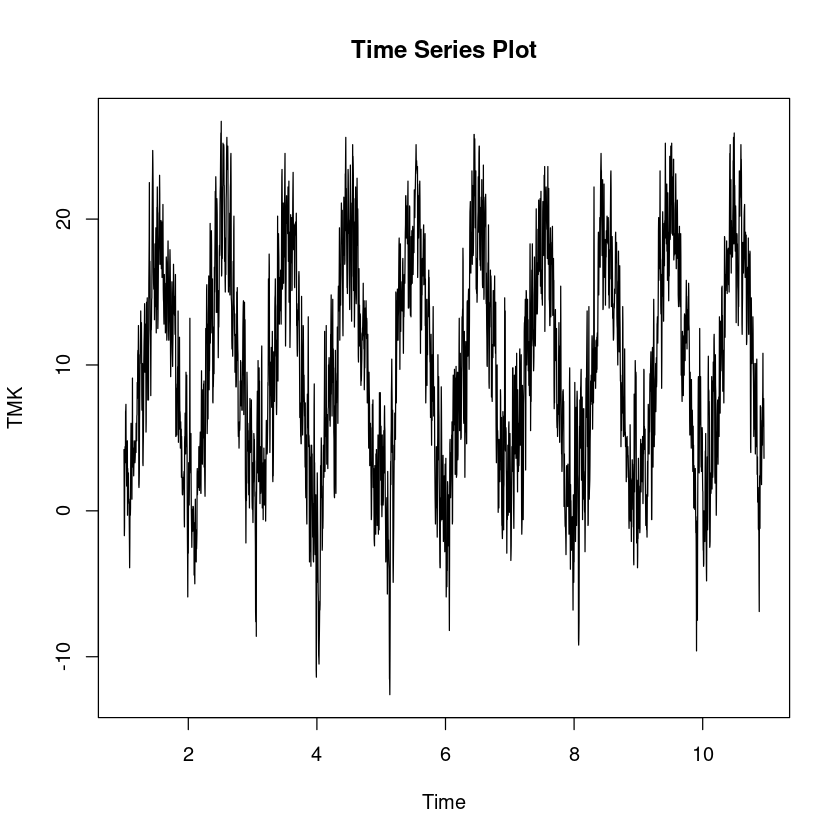

In [18]:
# Zeitreihe erstellen (Annahme: Tägliche Daten für 10 Jahre)
ts_data <- ts(wetterdaten[[1]]$TMK, frequency = 365)
head(ts_data)
ts_data
frequency(ts_data)
# Create a time series object
ts_data <- ts(wetterdaten[[1]]$TMK, frequency = 365)

# Plot the time series data
plot(ts_data, main="Time Series Plot", ylab="TMK")

# Saisonale Dekomposition
decomposed <- stl(ts_data, s.window = "periodic")

# Bereinigte Daten für Regression verwenden
fit <- lm(decomposed$time.series[, "seasonal"] ~ decomposed$time.series[, "trend"])

# Zusammenfassung des Modells anzeigen
summary(fit)

Warning message:
“'newdata' hat 1095 Zeilen , aber die gefundenen Variablen haben 3634 Zeilen”


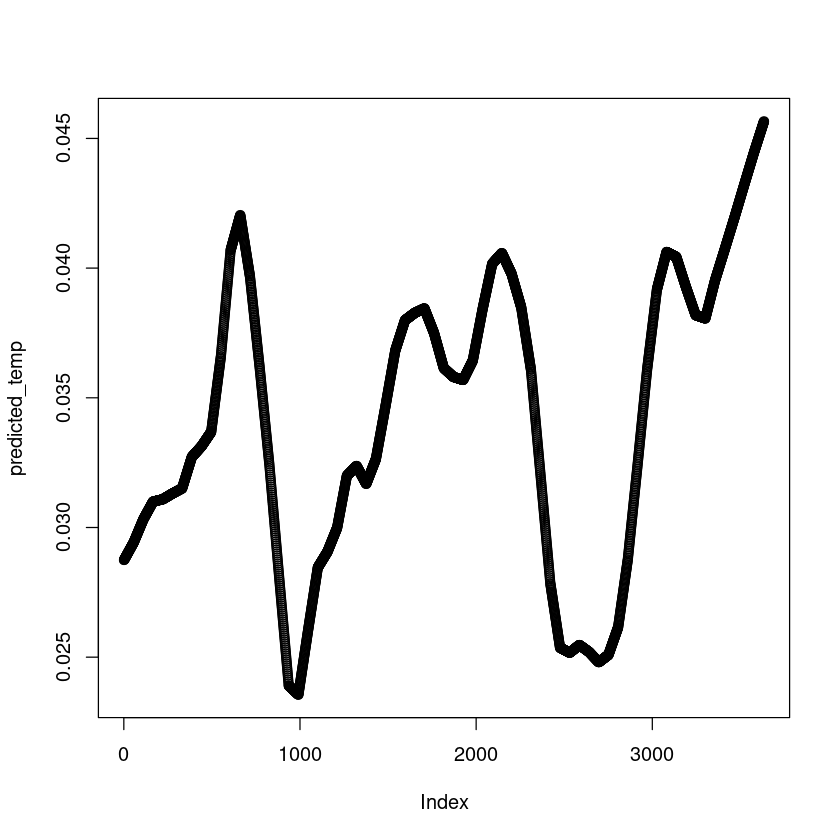

In [23]:
# Vorhersage für die nächsten drei Jahre
# Erzeuge zukünftige Trends
future_trend <- seq(max(decomposed$time.series[, "trend"]), by = 1, length.out = 3 * 365)
df <- data.frame(trend = future_trend)
predicted_temp <- predict(fit, newdata = df)

# Vorhersagen anzeigen oder plotten
plot(predicted_temp)